<a href="https://colab.research.google.com/github/arnav4567/snt_mpt/blob/master/snt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
#read the nifty50 csv file into a dataframe df
df = pd.read_csv(r'C:\Users\arnav\Documents\GitHub\snt_mpt\nifty50.csv')

In [11]:
#print df
df

,Date,ADANIPORTS.NS,TECHM.NS,BRITANNIA.NS,TCS.NS,SUNPHARMA.NS,INFY.NS,HINDALCO.NS,DRREDDY.NS,HCLTECH.NS,...,RELIANCE.NS,SBILIFE.NS,HDFCLIFE.NS,BAJFINANCE.NS,AXISBANK.NS,HDFCBANK.NS,TATAMOTORS.NS,ICICIBANK.NS,POWERGRID.NS,INDUSINDBK.NS
0,01-01-2016,267.549988,520.049988,1493.199951,1208.199951,815.549988,552.625000,84.900002,3108.600098,422.924988,...,507.674988,NaN,NaN,609.585022,449.899994,544.375000,401.899994,239.091003,141.000000,963.849976
1,04-01-2016,257.950012,516.400024,1486.300049,1184.800049,799.099976,539.450012,80.750000,3056.000000,422.975006,...,497.649994,NaN,NaN,605.244995,438.399994,535.250000,377.049988,232.317993,140.949997,934.200012
2,05-01-2016,255.699997,521.900024,1483.349976,1174.469971,800.500000,537.025024,82.599998,3070.649902,421.399994,...,502.575012,NaN,NaN,599.784973,436.450012,531.200012,374.450012,233.363998,139.149994,935.250000
3,06-01-2016,251.800003,525.099976,1500.849976,1190.800049,791.950012,534.674988,80.550003,3046.250000,420.700012,...,516.099976,NaN,NaN,610.724976,430.700012,533.549988,365.899994,227.363998,139.500000,943.950012
4,07-01-2016,245.000000,510.799988,1473.280029,1185.619995,783.799988,525.400024,76.650002,2991.800049,412.524994,...,506.625000,NaN,NaN,610.630005,409.250000,528.099976,343.549988,224.317993,138.100006,925.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#drop stock columns of "SBILIFE.NS" & "HDFCLIFE.NS"
df = df.drop(["SBILIFE.NS","HDFCLIFE.NS"],axis=1)

#drop null values if any exist 
df.dropna(inplace =True)

#print df 
df

,Date,ADANIPORTS.NS,TECHM.NS,BRITANNIA.NS,TCS.NS,SUNPHARMA.NS,INFY.NS,HINDALCO.NS,DRREDDY.NS,HCLTECH.NS,...,ONGC.NS,SBIN.NS,RELIANCE.NS,BAJFINANCE.NS,AXISBANK.NS,HDFCBANK.NS,TATAMOTORS.NS,ICICIBANK.NS,POWERGRID.NS,INDUSINDBK.NS
0,01-01-2016,267.549988,520.049988,1493.199951,1208.199951,815.549988,552.625000,84.900002,3108.600098,422.924988,...,161.667007,227.800003,507.674988,609.585022,449.899994,544.375000,401.899994,239.091003,141.000000,963.849976
1,04-01-2016,257.950012,516.400024,1486.300049,1184.800049,799.099976,539.450012,80.750000,3056.000000,422.975006,...,158.699997,220.699997,497.649994,605.244995,438.399994,535.250000,377.049988,232.317993,140.949997,934.200012
2,05-01-2016,255.699997,521.900024,1483.349976,1174.469971,800.500000,537.025024,82.599998,3070.649902,421.399994,...,161.233002,217.750000,502.575012,599.784973,436.450012,531.200012,374.450012,233.363998,139.149994,935.250000
3,06-01-2016,251.800003,525.099976,1500.849976,1190.800049,791.950012,534.674988,80.550003,3046.250000,420.700012,...,158.367004,216.850006,516.099976,610.724976,430.700012,533.549988,365.899994,227.363998,139.500000,943.950012
4,07-01-2016,245.000000,510.799988,1473.280029,1185.619995,783.799988,525.400024,76.650002,2991.800049,412.524994,...,151.067001,209.550003,506.625000,610.630005,409.250000,528.099976,343.549988,224.317993,138.100006,925.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,24-12-2020,478.549988,947.250000,3618.250000,2909.350098,590.450012,1236.050049,236.949997,5201.799805,919.349976,...,93.150002,266.850006,1994.150024,5184.899902,610.200012,1397.099976,175.949997,513.549988,190.000000,852.799988
1228,28-12-2020,483.549988,947.099976,3603.550049,2929.399902,586.950012,1240.300049,239.899994,5201.799805,921.799988,...,93.800003,275.200012,2003.300049,5204.100098,617.650024,1412.849976,186.350006,520.099976,191.550003,866.950012
1229,29-12-2020,483.399994,965.650024,3593.300049,2930.500000,590.599976,1250.300049,235.600006,5165.600098,935.900024,...,93.150002,277.899994,1990.050049,5200.500000,630.200012,1427.199951,183.449997,528.799988,189.699997,912.900024
1230,30-12-2020,485.399994,983.250000,3583.899902,2909.300049,584.000000,1246.800049,237.399994,5170.950195,940.700012,...,93.250000,276.899994,1995.500000,5334.149902,625.099976,1432.500000,184.149994,528.750000,190.199997,899.049988


In [13]:
#reset index to date using set_index function 
df = df.set_index("Date")

#print df
df1 = df.copy()
df

,ADANIPORTS.NS,TECHM.NS,BRITANNIA.NS,TCS.NS,SUNPHARMA.NS,INFY.NS,HINDALCO.NS,DRREDDY.NS,HCLTECH.NS,HINDUNILVR.NS,...,ONGC.NS,SBIN.NS,RELIANCE.NS,BAJFINANCE.NS,AXISBANK.NS,HDFCBANK.NS,TATAMOTORS.NS,ICICIBANK.NS,POWERGRID.NS,INDUSINDBK.NS
Date,,,,,,,,,,,,,,,,,,,,,
01-01-2016,267.549988,520.049988,1493.199951,1208.199951,815.549988,552.625000,84.900002,3108.600098,422.924988,856.549988,...,161.667007,227.800003,507.674988,609.585022,449.899994,544.375000,401.899994,239.091003,141.000000,963.849976
04-01-2016,257.950012,516.400024,1486.300049,1184.800049,799.099976,539.450012,80.750000,3056.000000,422.975006,859.000000,...,158.699997,220.699997,497.649994,605.244995,438.399994,535.250000,377.049988,232.317993,140.949997,934.200012
05-01-2016,255.699997,521.900024,1483.349976,1174.469971,800.500000,537.025024,82.599998,3070.649902,421.399994,847.950012,...,161.233002,217.750000,502.575012,599.784973,436.450012,531.200012,374.450012,233.363998,139.149994,935.250000
06-01-2016,251.800003,525.099976,1500.849976,1190.800049,791.950012,534.674988,80.550003,3046.250000,420.700012,843.049988,...,158.367004,216.850006,516.099976,610.724976,430.700012,533.549988,365.899994,227.363998,139.500000,943.950012
07-01-2016,245.000000,510.799988,1473.280029,1185.619995,783.799988,525.400024,76.650002,2991.800049,412.524994,820.250000,...,151.067001,209.550003,506.625000,610.630005,409.250000,528.099976,343.549988,224.317993,138.100006,925.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24-12-2020,478.549988,947.250000,3618.250000,2909.350098,590.450012,1236.050049,236.949997,5201.799805,919.349976,2402.250000,...,93.150002,266.850006,1994.150024,5184.899902,610.200012,1397.099976,175.949997,513.549988,190.000000,852.799988
28-12-2020,483.549988,947.099976,3603.550049,2929.399902,586.950012,1240.300049,239.899994,5201.799805,921.799988,2388.899902,...,93.800003,275.200012,2003.300049,5204.100098,617.650024,1412.849976,186.350006,520.099976,191.550003,866.950012
29-12-2020,483.399994,965.650024,3593.300049,2930.500000,590.599976,1250.300049,235.600006,5165.600098,935.900024,2384.300049,...,93.150002,277.899994,1990.050049,5200.500000,630.200012,1427.199951,183.449997,528.799988,189.699997,912.900024


In [14]:
name = list(df)
name

['ADANIPORTS.NS',
 'TECHM.NS',
 'BRITANNIA.NS',
 'TCS.NS',
 'SUNPHARMA.NS',
 'INFY.NS',
 'HINDALCO.NS',
 'DRREDDY.NS',
 'HCLTECH.NS',
 'HINDUNILVR.NS',
 'TATASTEEL.NS',
 'NTPC.NS',
 'CIPLA.NS',
 'ITC.NS',
 'BPCL.NS',
 'WIPRO.NS',
 'JSWSTEEL.NS',
 'GAIL.NS',
 'DIVISLAB.NS',
 'ULTRACEMCO.NS',
 'NESTLEIND.NS',
 'ASIANPAINT.NS',
 'EICHERMOT.NS',
 'IOC.NS',
 'GRASIM.NS',
 'BAJAJ-AUTO.NS',
 'HDFC.NS',
 'M&M.NS',
 'UPL.NS',
 'SHREECEM.NS',
 'MARUTI.NS',
 'TITAN.NS',
 'BAJAJFINSV.NS',
 'KOTAKBANK.NS',
 'COALINDIA.NS',
 'BHARTIARTL.NS',
 'HEROMOTOCO.NS',
 'LT.NS',
 'ONGC.NS',
 'SBIN.NS',
 'RELIANCE.NS',
 'BAJFINANCE.NS',
 'AXISBANK.NS',
 'HDFCBANK.NS',
 'TATAMOTORS.NS',
 'ICICIBANK.NS',
 'POWERGRID.NS',
 'INDUSINDBK.NS']

In [15]:
def CAGR(df,name):
    
    #USING df[name] and iloc function, identify the initial price of stock 
    start_value = df[name].iloc[0]
    
    #Like we did for Start Value, USING df[name] and iloc function, identify the final price of stock 
    end_value = df[name].iloc[-1]
    
    #Specify the Number of years we are taking into account 
    n = 5
    
    #WRITE THE CAGR FUNCTION USING START VALUE, END VALUE AND NUMBER OF PERIODS
    cagr = (end_value/start_value)**(1/n) -1 
    
    return cagr

In [16]:
def volatility(df,name):
    df[name] = df[name].pct_change()
    vol = df[name].std(ddof=0) * np.sqrt(252)
    return vol

In [17]:
def sharpe(x,y,rf):
    
    #Write down the Sharpe Ratio formula using CAGR, Volatility and Risk-Free rate
    sr = (x - 0.06)/y
    
    return sr

In [18]:
cagr = []
vol = []
sr = []
rf = 0.06
for i in range(len(name)):
    x = CAGR(df, name[i])
    y = volatility(df, name[i])
    z = sharpe(x,y,rf)
    cagr.append(x)
    vol.append(y)
    sr.append(z)

#PRINT CAGR, VOL, SR LIST
print(sr)

[0.18068245477048975, 0.2377264058051561, 0.4918751866486565, 0.4946191914163389, -0.36961621138164863, 0.41570605505803615, 0.41046467489148025, 0.16636760759121033, 0.4143447514130646, 0.7160329573311025, 0.3992257748630759, -0.3718628060994289, -0.05004698085182652, -0.24948713378300802, -0.02592969421681889, 0.27573429619633294, 0.6740290736724796, -0.07533354796957267, 0.5875533268898606, 0.2548808424823195, 0.7959769550066873, 0.7706575605456925, 0.05275515837725695, -0.2844876958908887, 0.11137706066041979, 0.017753058462484417, 0.30947275175411393, -0.1048478863476168, 0.09974581738352331, 0.33368316667886433, 0.14378562456984886, 0.8446366391063602, 0.7895699676143428, 0.576454875762035, -0.7667258140856203, 0.12349731204063495, -0.09885186515906187, 0.08372993852569967, -0.467959503184564, -0.056444278375967494, 0.8234749651084393, 1.1499479856380705, 0.01663937473646883, 0.6516208486873812, -0.4252812316868387, 0.31204936060462796, 0.005358393500279929, -0.15840154869587744]

#### IDENTIFY THE TOP 15 STOCKS LOOKING AT THE SHARPE RATIO LIST AND MAKE A LIST OF THE STOCK NAMES

In [19]:
df0 = pd.DataFrame()
df0["Name"] = name
df0["Sharpe Ratio"] = sr 
#Top_15 = sr.sort_values(ascending = False).head(15)

In [20]:
df0.sort_values(by = "Sharpe Ratio", ascending = False, inplace = True)

In [21]:
top_15 = df0.head(15)
top_15

,Name,Sharpe Ratio
41,BAJFINANCE.NS,1.149948
31,TITAN.NS,0.844637
40,RELIANCE.NS,0.823475
20,NESTLEIND.NS,0.795977
32,BAJAJFINSV.NS,0.789570
21,ASIANPAINT.NS,0.770658
9,HINDUNILVR.NS,0.716033
16,JSWSTEEL.NS,0.674029
43,HDFCBANK.NS,0.651621
18,DIVISLAB.NS,0.587553


In [22]:
newlist = top_15["Name"].tolist()
newlist

['BAJFINANCE.NS',
 'TITAN.NS',
 'RELIANCE.NS',
 'NESTLEIND.NS',
 'BAJAJFINSV.NS',
 'ASIANPAINT.NS',
 'HINDUNILVR.NS',
 'JSWSTEEL.NS',
 'HDFCBANK.NS',
 'DIVISLAB.NS',
 'KOTAKBANK.NS',
 'TCS.NS',
 'BRITANNIA.NS',
 'INFY.NS',
 'HCLTECH.NS']

In [23]:
df2 = pd.DataFrame()
for i in range(len(newlist)):
    df2[newlist[i]] = df1[newlist[i]]
    
df2

,BAJFINANCE.NS,TITAN.NS,RELIANCE.NS,NESTLEIND.NS,BAJAJFINSV.NS,ASIANPAINT.NS,HINDUNILVR.NS,JSWSTEEL.NS,HDFCBANK.NS,DIVISLAB.NS,KOTAKBANK.NS,TCS.NS,BRITANNIA.NS,INFY.NS,HCLTECH.NS
Date,,,,,,,,,,,,,,,
01-01-2016,609.585022,352.049988,507.674988,5785.149902,1983.800049,878.750000,856.549988,102.699997,544.375000,1162.500000,727.250000,1208.199951,1493.199951,552.625000,422.924988
04-01-2016,605.244995,351.399994,497.649994,5669.799805,1959.500000,880.799988,859.000000,104.470001,535.250000,1149.699951,705.299988,1184.800049,1486.300049,539.450012,422.975006
05-01-2016,599.784973,347.700012,502.575012,5662.399902,1946.000000,900.650024,847.950012,108.309998,531.200012,1147.500000,707.750000,1174.469971,1483.349976,537.025024,421.399994
06-01-2016,610.724976,347.850006,516.099976,5719.500000,1938.550049,886.400024,843.049988,105.820000,533.549988,1137.199951,703.599976,1190.800049,1500.849976,534.674988,420.700012
07-01-2016,610.630005,344.049988,506.625000,5638.950195,1927.050049,872.349976,820.250000,102.635002,528.099976,1126.949951,691.650024,1185.619995,1473.280029,525.400024,412.524994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24-12-2020,5184.899902,1495.900024,1994.150024,18566.300780,8992.549805,2648.250000,2402.250000,366.250000,1397.099976,3749.600098,1960.599976,2909.350098,3618.250000,1236.050049,919.349976
28-12-2020,5204.100098,1543.550049,2003.300049,18597.300780,8995.049805,2683.899902,2388.899902,386.600006,1412.849976,3766.000000,1988.900024,2929.399902,3603.550049,1240.300049,921.799988
29-12-2020,5200.500000,1540.099976,1990.050049,18262.699220,8976.049805,2696.800049,2384.300049,381.799988,1427.199951,3784.199951,1999.300049,2930.500000,3593.300049,1250.300049,935.900024


In [24]:
# print(df2['ASIANPAINT.NS'][0])
# print(np.log(df2['ASIANPAINT.NS'][1]/df2['ASIANPAINT.NS'][0]))

In [25]:
#CALCULATE LOG RETURNS OF the 15 STOCKS & STORE THEM IN df3 (Similar format as df2) 
def logreturns(df,name):
    res = []
    for i in range(1231):
        res.append(np.log(df2[name][i+1]/df2[name][i]))
    return res

df3 = pd.DataFrame()

for i in newlist:
    temp = logreturns(df2,i)
    df3[i] = logreturns(df2,i)
    
df3

,BAJFINANCE.NS,TITAN.NS,RELIANCE.NS,NESTLEIND.NS,BAJAJFINSV.NS,ASIANPAINT.NS,HINDUNILVR.NS,JSWSTEEL.NS,HDFCBANK.NS,DIVISLAB.NS,KOTAKBANK.NS,TCS.NS,BRITANNIA.NS,INFY.NS,HCLTECH.NS
0,-0.007145,-0.001848,-0.019944,-0.020140,-0.012325,0.002330,0.002856,0.017088,-0.016904,-0.011072,-0.030647,-0.019558,-0.004632,-0.024130,0.000118
1,-0.009062,-0.010585,0.009848,-0.001306,-0.006913,0.022286,-0.012947,0.036098,-0.007595,-0.001915,0.003468,-0.008757,-0.001987,-0.004505,-0.003731
2,0.018076,0.000431,0.026556,0.010034,-0.003836,-0.015948,-0.005795,-0.023258,0.004414,-0.009017,-0.005881,0.013808,0.011729,-0.004386,-0.001662
3,-0.000156,-0.010984,-0.018529,-0.014183,-0.005950,-0.015978,-0.027417,-0.030561,-0.010267,-0.009054,-0.017130,-0.004360,-0.018540,-0.017499,-0.019623
4,0.033528,0.011416,0.012261,-0.001136,0.037357,0.002576,-0.012760,0.014317,0.005806,0.002437,0.004976,0.011055,-0.015135,0.011826,0.003992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,0.018689,0.003382,0.025547,-0.008922,-0.002299,0.002155,0.013368,-0.001637,0.015472,0.016402,0.020535,0.000206,-0.001960,-0.013660,-0.003529
1227,0.003696,0.031357,0.004578,0.001668,0.000278,0.013372,-0.005573,0.054074,0.011210,0.004364,0.014331,0.006868,-0.004071,0.003432,0.002661
1228,-0.000692,-0.002238,-0.006636,-0.018156,-0.002115,0.004795,-0.001927,-0.012494,0.010106,0.004821,0.005215,0.000375,-0.002848,0.008030,0.015180
1229,0.025375,0.008084,0.002735,0.006359,-0.001600,0.013846,0.009309,0.011200,0.003707,0.004088,0.009285,-0.007261,-0.002619,-0.002803,0.005116


In [26]:
#CELL WILL TAKE 10-15 MINS TO RUN
np.random.seed(42)

#no. of set of weights to be initialised
num_ports = 6000*100
all_weights = np.zeros((num_ports, df3.shape[1]))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    if x%6000 == 0:
        print(x)
    # Weights

    wts = np.random.random_sample((df3.shape[1],))
    wts/=wts.sum()
    
    # Save weights

    all_weights[x] = wts

    # Expected return

    ret_arr[x] = np.sum((df3.mean()*wts*252))

    # Expected volatility

    vol_arr[x] = np.sqrt(np.dot(np.dot(df3.cov()*252, wts) , wts.T))

    # Sharpe Ratio

    sharpe_arr[x] = ret_arr[x]/vol_arr[x]
print(all_weights)

0
6000
12000
18000
24000
30000
36000
42000
48000
54000
60000
66000
72000
78000
84000
90000
96000
102000
108000
114000
120000
126000
132000
138000
144000
150000
156000
162000
168000
174000
180000
186000
192000
198000
204000
210000
216000
222000
228000
234000
240000
246000
252000
258000
264000
270000
276000
282000
288000
294000
300000
306000
312000
318000
324000
330000
336000
342000
348000
354000
360000
366000
372000
378000
384000
390000
396000
402000
408000
414000
420000
426000
432000
438000
444000
450000
456000
462000
468000
474000
480000
486000
492000
498000
504000
510000
516000
522000
528000
534000
540000
546000
552000
558000
564000
570000
576000
582000
588000
594000
[[0.05048753 0.12815507 0.09867184 ... 0.1122122  0.02862304 0.02450977]
 [0.03195507 0.05300896 0.09142975 ... 0.08959647 0.10321801 0.00809318]
 [0.08789189 0.02466927 0.00941084 ... 0.0049749  0.13154895 0.03743701]
 ...
 [0.04911169 0.0715599  0.09529624 ... 0.02026925 0.0842684  0.08768166]
 [0.03191993 0.07370399 0

In [27]:
#OUTPUT MAXIMUM SHARPE RATIO FROM THE RANDOM WEIGHTS & THE WEIGHTS CORRESPONDING TO IT USING MAX & ARGMAX

print("Max Sharpe Ratio : ",np.max(sharpe_arr))

p = sharpe_arr.argmax()

good_weights = all_weights[p]

for i in range(df3.shape[1]):
    print(good_weights[i], " ", newlist[i]);


Max Sharpe Ratio :  1.4459370971008934
0.12558355211769517   BAJFINANCE.NS
0.07302061364804262   TITAN.NS
0.10192346147859908   RELIANCE.NS
0.12388195431827916   NESTLEIND.NS
0.001268583196979149   BAJAJFINSV.NS
0.13972776520072336   ASIANPAINT.NS
0.12606656647894382   HINDUNILVR.NS
0.05210896406894422   JSWSTEEL.NS
0.004278567188133862   HDFCBANK.NS
0.09537333407557481   DIVISLAB.NS
0.0024603524179446666   KOTAKBANK.NS
0.13186495678178634   TCS.NS
0.009874906479498879   BRITANNIA.NS
0.006840086139065747   INFY.NS
0.005726336409789101   HCLTECH.NS


In [28]:
#POINT p is the point of maximum sharpe ratio
mr = ret_arr[p]
mv = vol_arr[p]


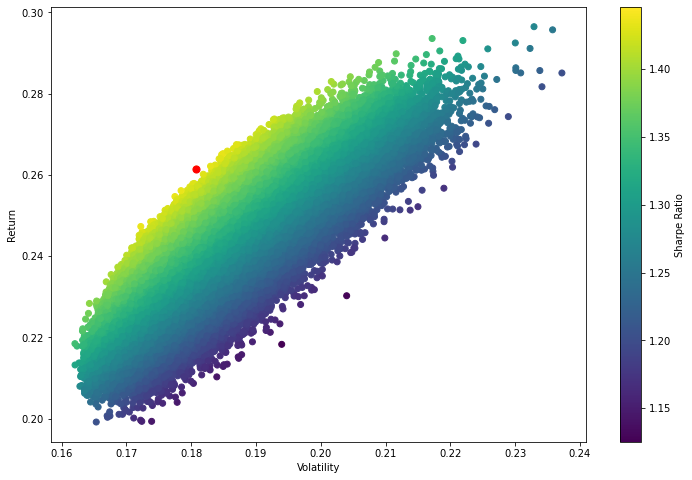

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(mv, mr,c='red', s=50) # red dot

plt.show()

In [30]:
fy = np.linspace(0.2,0.35,50)

In [31]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(df3.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(df3.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def min_vol(weights):
    return get_ret_vol_sr(weights)[1]

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

In [32]:
a = 1/15
c = ((0,1),)
b = []
d = ()
for i in range(15):
    b.append(a)
    d = d+c

In [64]:
from scipy.optimize import minimize
fx = []

for i in fy:
    print(i)
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - i})
    
    result = minimize(min_vol, b, method='SLSQP', bounds=d, constraints=cons)
    fx.append(result['fun'])

0.2
0.20306122448979594
0.20612244897959184
0.20918367346938777
0.2122448979591837
0.2153061224489796
0.21836734693877552
0.22142857142857145
0.22448979591836735
0.22755102040816327
0.23061224489795917
0.2336734693877551
0.23673469387755103
0.23979591836734693
0.24285714285714285
0.24591836734693878
0.24897959183673468
0.25204081632653064
0.25510204081632654
0.25816326530612244
0.2612244897959184
0.2642857142857143
0.2673469387755102
0.27040816326530615
0.27346938775510204
0.27653061224489794
0.2795918367346939
0.2826530612244898
0.2857142857142857
0.28877551020408165
0.29183673469387755
0.29489795918367345
0.2979591836734694
0.3010204081632653
0.3040816326530612
0.30714285714285716
0.31020408163265306
0.31326530612244896
0.3163265306122449
0.3193877551020408
0.3224489795918367
0.32551020408163267
0.32857142857142857
0.33163265306122447
0.3346938775510204
0.3377551020408163
0.3408163265306122
0.3438775510204082
0.3469387755102041
0.35


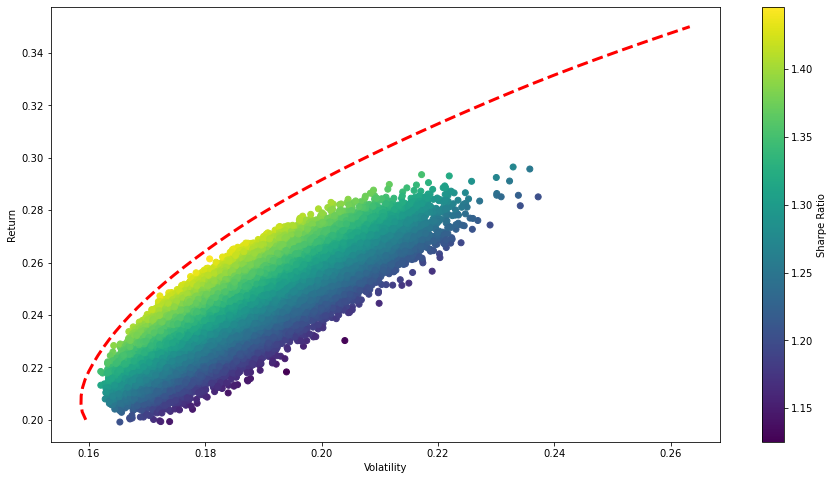

In [65]:
plt.figure(figsize=(15,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(fx,fy, 'r--', linewidth=3)
plt.show()

In [66]:
#OUTPUT THE MONEY INVESTED IN ALL THE 15 STOCKS AS GIVEN BELOW, store the result in an array "mon", taking the pth value of all_weights array
mon = [10000000*i for i in good_weights]
print(mon)

[1255835.5211769517, 730206.1364804262, 1019234.6147859908, 1238819.5431827914, 12685.831969791489, 1397277.6520072336, 1260665.6647894382, 521089.64068944217, 42785.671881338625, 953733.3407557481, 24603.524179446667, 1318649.5678178633, 98749.0647949888, 68400.86139065748, 57263.36409789101]


In [67]:
#Store the number of stocks that you'll hold for the 15 stocks (in num_sto) basis the prices on the last day
num_sto = []
for i in range(len(mon)):
    num_sto.append(mon[i]/df2[newlist[i]][-1])

In [68]:
num_sto

[237.16488044451577,
 465.94526707573607,
 513.3907165817991,
 67.36303007721258,
 1.4243581856445724,
 505.4359385086756,
 526.2860968378875,
 1345.7893188812307,
 29.788811823217188,
 248.2452341507538,
 12.328885786400043,
 460.623375362104,
 27.61168847820916,
 54.467955663105315,
 60.52249920323631]

In [69]:
newlist

['BAJFINANCE.NS',
 'TITAN.NS',
 'RELIANCE.NS',
 'NESTLEIND.NS',
 'BAJAJFINSV.NS',
 'ASIANPAINT.NS',
 'HINDUNILVR.NS',
 'JSWSTEEL.NS',
 'HDFCBANK.NS',
 'DIVISLAB.NS',
 'KOTAKBANK.NS',
 'TCS.NS',
 'BRITANNIA.NS',
 'INFY.NS',
 'HCLTECH.NS']

In [70]:
#Output the number of shares you'll hold of each of the top 15 stocks in the dataframe DF
resdf = pd.DataFrame()
resdf['Name'] = newlist
resdf['No. of shares'] = num_sto
resdf


,Name,No. of shares
0,BAJFINANCE.NS,237.164880
1,TITAN.NS,465.945267
2,RELIANCE.NS,513.390717
3,NESTLEIND.NS,67.363030
4,BAJAJFINSV.NS,1.424358
5,ASIANPAINT.NS,505.435939
6,HINDUNILVR.NS,526.286097
7,JSWSTEEL.NS,1345.789319
8,HDFCBANK.NS,29.788812
9,DIVISLAB.NS,248.245234


In [87]:
# !pip install pandas_datareader
# !pip install yfinance
import pandas_datareader.data as pdr
import datetime as dt
from statistics import stdev
import yfinance as yf

In [88]:
final_date = dt.datetime(2021,6,30)
init_date = dt.datetime(2021, 1, 1)

In [89]:
newdf = pd.DataFrame()
yf.pdr_override()
for i in range(len(newlist)):
    try:
        o = pdr.get_data_yahoo(newlist[i],init_date, final_date)
        newdf[str(newlist[i])] = o["Close"]
    except:
        print('ran into errors! :(')
        print(i)
o = pdr.get_data_yahoo('^NSEI',init_date,final_date)
newdf['Nifty50'] = o["Close"]      


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [90]:
print(newdf)

            BAJFINANCE.NS     TITAN.NS  RELIANCE.NS  NESTLEIND.NS  \
Date                                                                
2021-01-01    5280.149902  1558.599976  1987.500000  18450.699219   
2021-01-04    5216.200195  1550.900024  1990.849976  18377.949219   
2021-01-05    5119.000000  1570.949951  1966.099976  18558.250000   
2021-01-06    5030.299805  1572.599976  1914.250000  18515.250000   
2021-01-07    5081.000000  1542.349976  1911.150024  18127.300781   
...                   ...          ...          ...           ...   
2021-06-23    6015.600098  1782.550049  2205.350098  17414.800781   
2021-06-24    6043.600098  1780.849976  2153.500000  17619.750000   
2021-06-25    6075.799805  1753.849976  2104.449951  17506.699219   
2021-06-28    6037.049805  1728.050049  2086.000000  17506.150391   
2021-06-29    6052.399902  1731.599976  2087.800049  17599.250000   

            BAJAJFINSV.NS  ASIANPAINT.NS  HINDUNILVR.NS  JSWSTEEL.NS  \
Date                          

In [92]:
temp=[]

for i in range(newdf.shape[0]):
    initv = 0
    for j in range(len(newlist)):
        initv+=newdf[newlist[j]][i]*(num_sto[j])
    temp.append(initv)

newdf["Portfolio"] = temp
newdf.dropna(inplace = True)
newdf

,BAJFINANCE.NS,TITAN.NS,RELIANCE.NS,NESTLEIND.NS,BAJAJFINSV.NS,ASIANPAINT.NS,HINDUNILVR.NS,JSWSTEEL.NS,HDFCBANK.NS,DIVISLAB.NS,KOTAKBANK.NS,TCS.NS,BRITANNIA.NS,INFY.NS,HCLTECH.NS,Nifty50,Portfolio
Date,,,,,,,,,,,,,,,,,
2021-01-01,5280.149902,1558.599976,1987.500000,18450.699219,8870.450195,2775.550049,2387.550049,389.700012,1425.050049,3849.050049,1994.050049,2928.250000,3567.800049,1260.449951,950.500000,14018.500000,1.003429e+07
2021-01-04,5216.200195,1550.900024,1990.849976,18377.949219,8898.750000,2753.699951,2426.500000,403.100006,1416.000000,3862.250000,1965.550049,3039.449951,3552.899902,1288.250000,980.400024,14132.900391,1.009667e+07
2021-01-05,5119.000000,1570.949951,1966.099976,18558.250000,8820.849609,2793.850098,2450.550049,395.250000,1426.699951,3842.100098,1959.750000,3093.000000,3551.100098,1293.800049,991.349976,14199.500000,1.012550e+07
2021-01-06,5030.299805,1572.599976,1914.250000,18515.250000,8786.349609,2805.350098,2417.300049,401.700012,1420.550049,3879.850098,1970.400024,3051.500000,3539.699951,1282.099976,978.200012,14146.250000,1.006112e+07
2021-01-07,5081.000000,1542.349976,1911.150024,18127.300781,8988.000000,2792.250000,2368.850098,405.399994,1416.250000,3803.050049,1952.400024,3032.800049,3552.800049,1262.150024,962.549988,14137.349609,9.974772e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-23,6015.600098,1782.550049,2205.350098,17414.800781,12282.250000,2987.350098,2480.500000,665.500000,1485.500000,4224.600098,1736.699951,3261.399902,3659.300049,1503.150024,972.900024,15686.950195,1.114954e+07
2021-06-24,6043.600098,1780.849976,2153.500000,17619.750000,12333.250000,3043.250000,2490.149902,679.000000,1506.250000,4250.350098,1737.900024,3373.600098,3689.100098,1559.199951,989.700012,15790.450195,1.125774e+07
2021-06-25,6075.799805,1753.849976,2104.449951,17506.699219,12486.599609,3003.899902,2448.649902,689.500000,1515.099976,4248.750000,1735.000000,3380.800049,3670.050049,1574.199951,995.650024,15860.349609,1.119642e+07


In [95]:
#Total return
Return_P = ((newdf['Portfolio'][-1] - newdf['Portfolio'][0])/newdf['Portfolio'][0])*100
Return_B = ((newdf['Nifty50'][-1] - newdf['Nifty50'][0])/newdf['Nifty50'][0])*100

print('Total Return on portfolio is', Return_P, '%')
print('Total Return on benchmark is', Return_B, '%')

Total Return on portfolio is 11.625118428281406 %
Total Return on benchmark is 12.340480046456468 %


In [97]:
#Volatility
x = newdf["Portfolio"].pct_change()
vol_P = x.std()*np.sqrt(120)*100
x1 = newdf["Nifty50"].pct_change()
vol_B = x1.std()*np.sqrt(120)*100

print('Volatility of Portfolio is', vol_P, '%')
print('Volatility of Benchmark is', vol_B, '%')

Volatility of Portfolio is 11.224865251260626 %
Volatility of Benchmark is 12.635737357346844 %


In [99]:
#Beta
newdf['daily_ret_P'] = newdf["Portfolio"].pct_change()
newdf['daily_ret_B'] = newdf["Nifty50"].pct_change()
p = newdf['daily_ret_P'].dropna()
q = newdf['daily_ret_B'].dropna()
beta = np.cov(p,q)[0][1]/np.var(q)
print('Beta of Portfolio: ', beta)

Beta of Portfolio:  0.7472846866253612


In [103]:
#Jenson's Alpha
rfp = 100*((1+0.06)**(181/365)-1)#adjusted rate(since yearly is 0.06, so adjust it for 181 days)
alpha = Return_P - rfp - beta*(Return_B - rfp)
print('Alpha of Portfolio in %: ', alpha, '%')

Alpha of Portfolio in %:  1.6623937358547014 %


In [104]:
#Sharpe Ratio
sr = (Return_P - rfp)/vol_P
print('Sharpe Ratio of Portfolio: ', sr)
sb = (Return_B - rfp)/vol_B
print('Sharpe Ratio of Benchmark: ', sb)

Sharpe Ratio of Portfolio:  0.7744830711559281
Sharpe Ratio of Benchmark:  0.7446205524216787


In [106]:
#Treynors Ratio
tr = (Return_P - rfp)/beta
print("Treynor :", tr)

Treynor : 11.633408617492671


In [107]:
newdf["cum_return"] = (1 + newdf["daily_ret_P"]).cumprod()
newdf["cum_roll_max"] = newdf["cum_return"].cummax()
newdf["drawdown"] = newdf["cum_roll_max"] - newdf["cum_return"]
newdf["drawdown_pct"] = newdf["drawdown"]/newdf["cum_roll_max"]
max_dd = newdf["drawdown_pct"].max()
print('Maximum Draw-down of Portfolio in %: ', max_dd*100, '%')

Maximum Draw-down of Portfolio in %:  7.850992145317679 %


In [108]:
newdf["cum_return_B"] = (1 + newdf["daily_ret_B"]).cumprod()
newdf["cum_roll_max_B"] = newdf["cum_return_B"].cummax()
newdf["drawdown_B"] = newdf["cum_roll_max_B"] - newdf["cum_return_B"]
newdf["drawdown_pct_B"] = newdf["drawdown_B"]/newdf["cum_roll_max_B"]
max_dd_B = newdf["drawdown_pct_B"].max()
print('Maximum Draw-down of Benchmark in %: ', max_dd_B*100, '%')

Maximum Draw-down of Benchmark in %:  6.897379751487254 %


In [116]:
y = []
count=0
for i in range(len(x)):
    if x[i] < 0:
        y.append(x[i])
        count=count+1
# print(y)
neg_vol = stdev(y)*np.sqrt(count)*100

sor = (Return_P - rfp)/neg_vol
print('Sortino Ratio of Portfolio: ', sor)
y = []
for i in range(len(x1)):
    if x1[i] < 0:
        y.append(x1[i])
# print(y)
neg_vol = stdev(y)*np.sqrt(115)*100

sor = (Return_B- rfp)/neg_vol
print('Sortino Ratio of Benchmark: ', sor)

Sortino Ratio of Portfolio:  1.9103622153691264
Sortino Ratio of Benchmark:  1.108730991587697
